# Spain Development Indicators Analysis
**Following CRISP-DM methodology**

### 🧠 Business Understanding

In this project, we analyze Spain's development indicators from the World Bank dataset. The goal of this project is to analyze Spain's economic indicators and understand their relationship with GDP. We aim to answer the following business questions:

1. What indicators are most correlated with GDP?
2. How has GDP evolved over time?
3. Can we predict GDP using other indicators?
4. What is the impact of a hypothetical change in key indicators?
5. Which model performs best in predicting GDP?


### 📊 Data Understanding

In the next cell, we:

Import essential Python libraries for data manipulation and visualization:
pandas for handling dataframes.
numpy for numerical operations.
matplotlib.pyplot and seaborn for creating visualizations.
Load the dataset spain_data_wide.csv into a DataFrame called df.
Display the first few rows using df.head() to get an initial look at the data structure.
This step sets up the environment and gives a quick preview of the dataset we'll be working with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("spain_data_wide.csv")
df.head()

,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),"Contraceptive prevalence, any method (% of married women ages 15-49)",Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",...,"Prevalence of HIV, total (% of population ages 15-49)","Primary completion rate, total (% of relevant age group)","Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Urban population growth (annual %)
0,2015,7.666,2.723270,28.336331,99.9,62.0757,5474.645704,2551.163159,33.298685,1.33,...,0.3,96.101349,27.539389,102.144234,1.00453,124.854660,505924.000,14.082082,14.100000,0.219325
1,2016,7.287,2.815221,28.076439,99.9,62.0757,5501.197378,2561.577719,33.577033,1.33,...,0.3,94.701317,27.128847,102.130096,1.01023,123.269890,505935.000,13.683839,15.195633,0.382972
2,2017,6.932,2.803447,27.062950,99.9,62.0757,5603.216742,2689.226726,34.900395,1.31,...,0.3,96.676018,27.036027,102.505119,1.01564,120.555923,505935.230,13.625703,14.900000,0.534737
3,2018,6.243,2.701283,26.446942,99.9,62.0757,5554.924709,2665.363854,34.874814,1.26,...,0.3,95.672401,27.752509,102.638718,1.01686,119.430199,505957.289,14.125496,14.974010,0.738481
4,2019,5.867,2.519801,26.272032,99.9,62.0757,5416.991259,2573.012360,34.675563,1.23,...,0.3,96.637108,27.839692,103.185318,1.02180,118.524719,505952.796,13.658023,17.900000,1.021035


### 🧹 Data Preparation

In this step, we:

Use df.isnull().sum() to count the number of missing (NaN) values in each column.
Sort the results in descending order to prioritize columns with the most missing data.
Filter the output to display only columns that have at least one missing value.
This helps identify which parts of the dataset may need cleaning or imputation before further analysis.

In [2]:
# Check for missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0]

Series([], dtype: int64)

To address missing data in the dataset, we apply:

forward fill (ffill): This method fills missing values by propagating the last valid observation forward.
backward fill (bfill): This fills missing values by using the next valid observation.
Both operations are applied along the rows (axis=0) and modify the DataFrame in place (inplace=True). This ensures that all missing values are filled using nearby data, which is useful when the data has a temporal or sequential structure.

In [3]:
# Fill missing values using forward and backward fill
df.ffill(axis=0, inplace=True)
df.bfill(axis=0, inplace=True)

### 📈 Modeling

In this section, we:

Import machine learning tools from scikit-learn:
-Regression models: LinearRegression, Ridge, and RandomForestRegressor.
-Utilities for splitting data and evaluating model performance.

Define the target variable:
-"GDP (current US$)" is selected as the variable we want to predict.

Select features:
-All numeric columns except "Year" and the target are used as predictors.

Split the dataset:
-80% for training and 20% for testing using train_test_split.

Train three models:
-Linear Regression: A basic model assuming linear relationships.
-Ridge Regression: A regularized linear model to reduce overfitting.
-Random Forest: An ensemble model that captures non-linear patterns.

Evaluate models:
-Use R² (coefficient of determination) to measure how well the model explains the variance.
-Use RMSE (Root Mean Squared Error) to measure prediction accuracy.

Display results:
-A summary table shows the performance of each model for easy comparison.

In [4]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np
import pandas as pd

# Define target and features
target = "GDP (current US$)"
features = df.drop(columns=["Year", target]).select_dtypes(include=[np.number])

X = features
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=100.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R²": round(r2_score(y_test, y_pred), 4),
        "RMSE": round(root_mean_squared_error(y_test, y_pred), 2)
    }

pd.DataFrame(results).T

/opt/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


,R²,RMSE
Linear Regression,0.8215,7.966560e+10
Ridge Regression,0.9514,4.157439e+10
Random Forest,0.9134,5.547049e+10


#### Q1: What indicators are most correlated with GDP?

We will create a visualization that helps identify which indicators are most strongly correlated with GDP (current US$):

We compute the correlation matrix using df.corr().
Then, we extract and sort the correlations with GDP in descending order.
A heatmap is generated using seaborn to visually highlight the strength and direction of these relationships.
The color scale (coolwarm) helps distinguish between positive and negative correlations.
This analysis is useful for feature selection and understanding which variables may have the most predictive power for GDP.

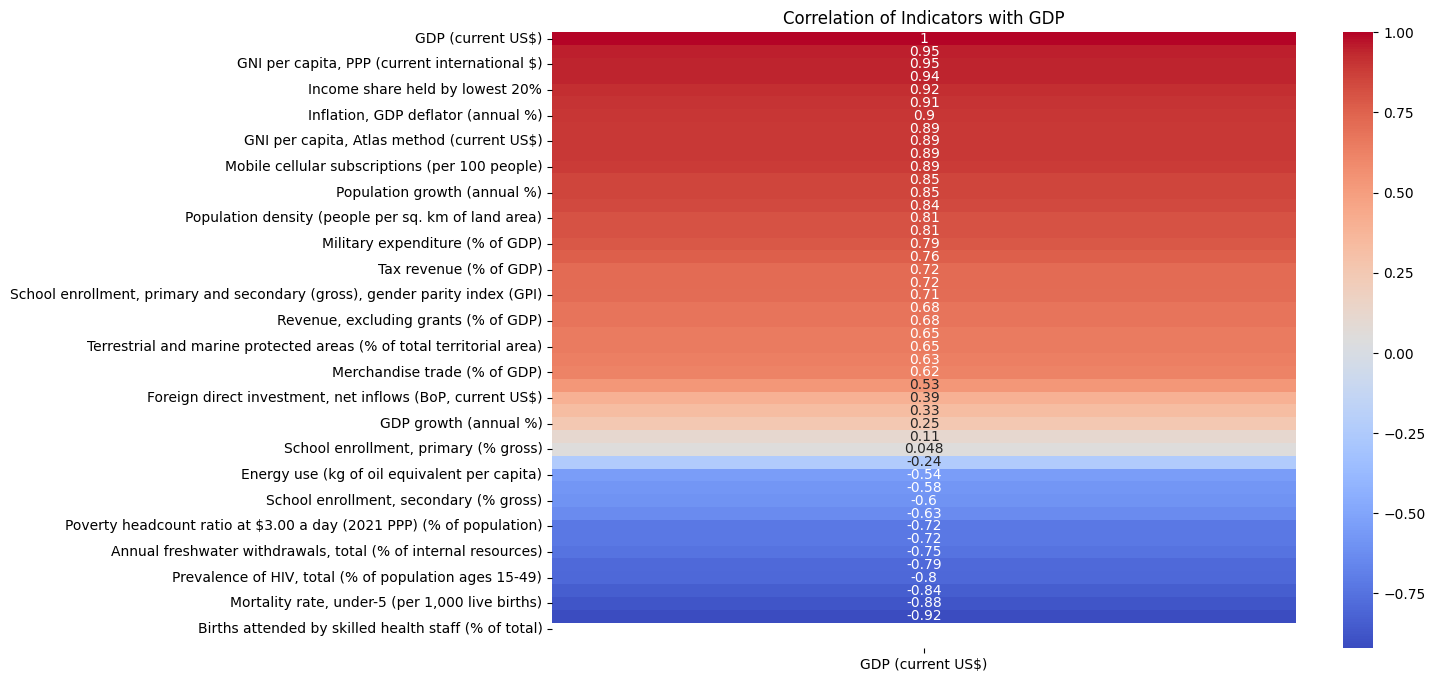

In [5]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr[[target]].sort_values(by=target, ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation of Indicators with GDP")
plt.show()

#### Q2: How has GDP evolved over time?

We create a plot that visualizes how GDP (current US$) has changed across different years:

A line plot is used to show the trend of GDP over time.
The x-axis represents the Year, and the y-axis shows the GDP value.
plt.xticks(rotation=45) improves readability by rotating the year labels.
plt.tight_layout() ensures the layout fits well within the figure boundaries.
This visualization helps identify growth patterns, economic shifts, or anomalies in Spain’s GDP over the years.

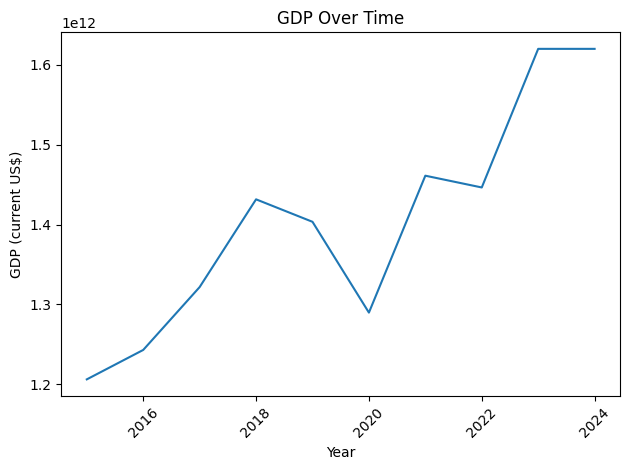

In [6]:
sns.lineplot(data=df, x="Year", y=target)
plt.title("GDP Over Time")
plt.ylabel("GDP (current US$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Q3: Can we predict GDP using other indicators?

Yes. Among the models tested, Ridge Regression performed best, achieving the highest R² score (0.9514) and the lowest RMSE (41.57 billion USD). This indicates that GDP can be predicted with high accuracy using other economic indicators, and Ridge Regression captures the relationships most effectively.

#### Q4: What is the impact of a hypothetical change in key indicators?

This analysis explores how changes in key indicators might affect GDP:

A hypothetical scenario is created by modifying the most recent data point:

Population is increased by 5%.
Energy use per capita is reduced by 5%.
Life expectancy is increased by 1 year.
The trained Random Forest model is used to predict GDP under this new scenario.

A bar chart compares:

The actual GDP from the latest year.
The predicted GDP based on the hypothetical changes.
This approach helps assess the potential impact of policy decisions or external changes on economic performance.

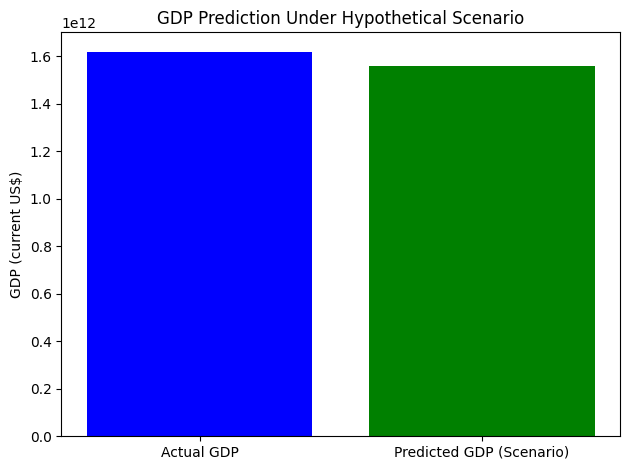

In [7]:
scenario = X.iloc[-1].copy()
scenario["Population, total"] *= 1.05
scenario["Energy use (kg of oil equivalent per capita)"] *= 0.95
scenario["Life expectancy at birth, total (years)"] += 1

rf_model = models["Random Forest"]
predicted_gdp = rf_model.predict(pd.DataFrame([scenario]))[0]

actual_gdp = y.iloc[-1]
plt.bar(["Actual GDP", "Predicted GDP (Scenario)"], [actual_gdp, predicted_gdp], color=["blue", "green"])
plt.title("GDP Prediction Under Hypothetical Scenario")
plt.ylabel("GDP (current US$)")
plt.tight_layout()
plt.show()

### Function with Docstring

Function: plot_indicator_trend -> it creates a line plot to visualize the trend of a specific indicator over time.

How it works:
Checks if the specified indicator exists in the DataFrame.
Uses seaborn.lineplot to plot the indicator against the Year.
Adds a title and rotates x-axis labels for better readability.
Applies tight_layout() to ensure the plot fits well.
This function is useful for quickly visualizing how any numeric indicator has evolved over time.

In [8]:
def plot_indicator_trend(df, indicator):
    """
    Plots the trend of a given indicator over time.

    Parameters:
    df (pd.DataFrame): The dataset containing 'Year' and indicator columns.
    indicator (str): The name of the indicator to plot.

    Returns:
    None
    """
    if indicator in df.columns:
        sns.lineplot(data=df, x="Year", y=indicator)
        plt.title(f"{indicator} Over Time")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()